import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
# from sklearn import cross_validation, linear_model
# import matplotlib.pyplot as plt

In [6]:
pd.set_option('display.max_columns', 500)

####Linear Regression

In [3]:
df = pd.read_pickle('df_neighborhoods_dists_seasons.pkl')

In [7]:
df.head(2)

,OBJECTID,WOKEY,LOCATION,ADDRDESC,INITDT_dt,FLDSTARTDT_dt,FLDENDDT_dt,DURATION,DURATION_td,latitude,longitude,address,address_detail,neighborhood_cat,Seattle_dist,Space_Needle_dist,Pike_Place_dist,Convention_Center_dist,Woodland_Park_dist,Queene_Anne_dist,INIT_Quarter,days_end_FY
0,1,2456,Holden pl SW bt SW Kenyon Holden ...,HOLDEN PL SW BETWEEN SW HOLDEN ST AND SW KENYO...,2010-03-29 07:00:00,2010-04-06 07:00:00,2010-04-06 07:00:00,8 days,8,47.531858,-122.363186,"SW Kenyon St, Seattle, WA, USA","2438 SW Kenyon St, Seattle, WA 98106, USA",93,5.338641,6.158729,5.467939,5.688451,9.453253,7.300465,1,3
1,2,2514,"NE Pacific Street, one block west of Montlake ...",MONTLAKE BLVD NE AND NE PACIFIC ST ...,2010-03-30 07:00:00,2010-04-01 07:00:00,2010-04-01 07:00:00,2 days,2,47.649014,-122.304655,"Montlake Blvd NE & NE Pacific St, Seattle, WA ...","3705-3707 Montlake Blvd NE, Seattle, WA 98105,...",42,3.222458,2.867154,3.231487,2.889531,2.654837,2.610214,1,3


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732 entries, 0 to 1000
Data columns (total 22 columns):
OBJECTID                  732 non-null int64
WOKEY                     732 non-null int64
LOCATION                  732 non-null object
ADDRDESC                  732 non-null object
INITDT_dt                 732 non-null datetime64[ns]
FLDSTARTDT_dt             732 non-null datetime64[ns]
FLDENDDT_dt               732 non-null datetime64[ns]
DURATION                  732 non-null timedelta64[ns]
DURATION_td               732 non-null float64
latitude                  732 non-null float64
longitude                 732 non-null float64
address                   732 non-null object
address_detail            732 non-null object
neighborhood_cat          732 non-null float64
Seattle_dist              732 non-null float64
Space_Needle_dist         732 non-null float64
Pike_Place_dist           732 non-null float64
Convention_Center_dist    732 non-null float64
Woodland_Park_dist        7

In [14]:
cat_vars = ['neighborhood_cat','INIT_Quarter','days_end_FY']
num_vars = ['DURATION_td','Queene_Anne_dist','Woodland_Park_dist','Space_Needle_dist','Seattle_dist','latitude','longitude','INITDT_dt','FLDENDDT_dt']

####A little EDA

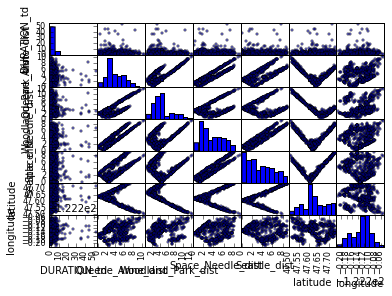

In [15]:
# Scatterplot matrix
from pandas.tools.plotting import scatter_matrix
ax = scatter_matrix(df[num_vars])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002429B6A0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001A8547B8>]], dtype=object)

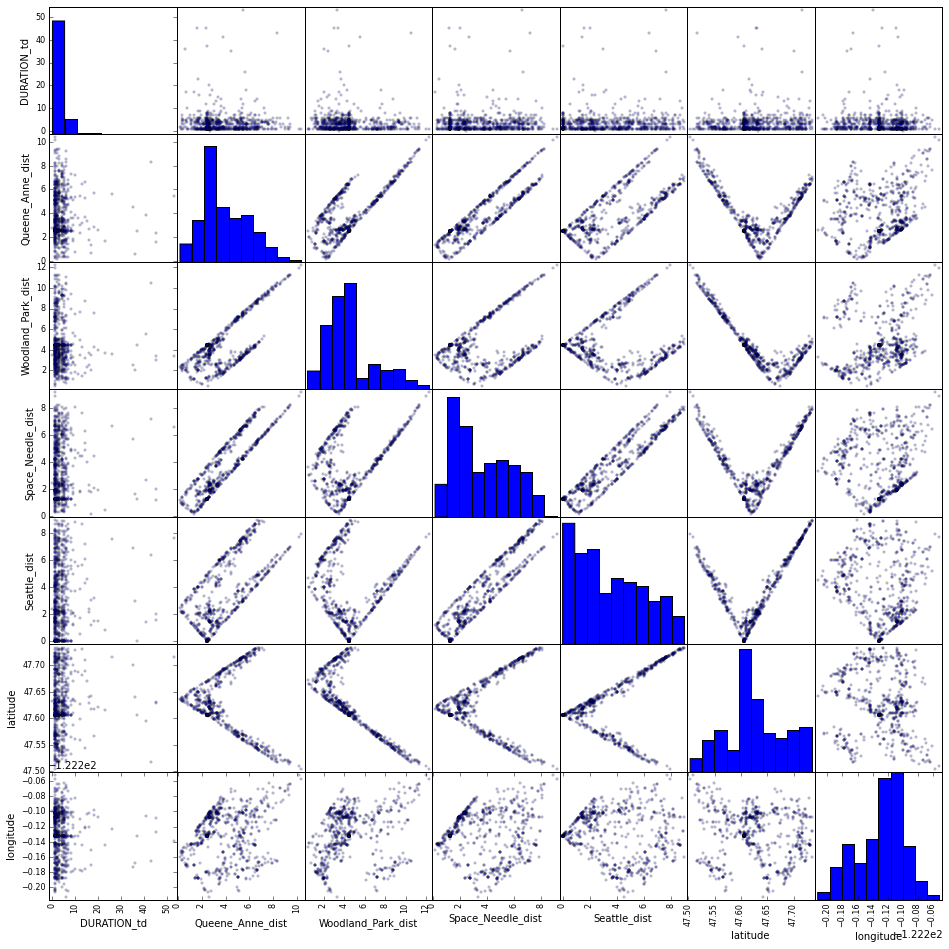

In [16]:
scatter_matrix(df[num_vars], alpha=0.2, figsize=(16, 16), diagonal='hist')

In [20]:
df_all = df.ix[:, ['neighborhood_cat','INIT_Quarter','days_end_FY',
                                        'Queene_Anne_dist','Woodland_Park_dist','Space_Needle_dist',
                                       'Seattle_dist','latitude','longitude','INITDT_dt','FLDENDDT_dt']]

In [21]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732 entries, 0 to 1000
Data columns (total 11 columns):
neighborhood_cat      732 non-null float64
INIT_Quarter          732 non-null int64
days_end_FY           732 non-null int64
Queene_Anne_dist      732 non-null float64
Woodland_Park_dist    732 non-null float64
Space_Needle_dist     732 non-null float64
Seattle_dist          732 non-null float64
latitude              732 non-null float64
longitude             732 non-null float64
INITDT_dt             732 non-null datetime64[ns]
FLDENDDT_dt           732 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(7), int64(2)
memory usage: 68.6 KB


In [22]:
df_all.describe().T

,count,mean,std,min,25%,50%,75%,max
neighborhood_cat,732,75.379781,26.232529,27.000000,57.000000,71.500000,100.250000,121.000000
INIT_Quarter,732,2.146175,1.161017,1.000000,1.000000,2.000000,3.000000,4.000000
days_end_FY,732,0.534153,3.657002,-6.000000,-2.000000,2.000000,3.000000,5.000000
Queene_Anne_dist,732,3.878190,1.963327,0.176986,2.473518,3.373124,5.315984,10.367543
Woodland_Park_dist,732,4.550216,2.349069,0.434205,3.006434,4.128260,5.045727,12.244218
Space_Needle_dist,732,3.618505,2.131963,0.171376,1.793431,3.211706,5.378682,9.142424
Seattle_dist,732,3.490789,2.544424,0.000000,1.395522,3.063883,5.629730,8.935073
latitude,732,47.626690,0.055167,47.503724,47.600036,47.619313,47.668522,47.734072
longitude,732,-122.329997,0.031289,-122.412756,-122.350187,-122.329789,-122.304641,-122.251756


In [30]:
df_data = pd.concat([df.ix[:, ['Queene_Anne_dist','Woodland_Park_dist','Space_Needle_dist',
                    'Seattle_dist','latitude','longitude']],
                    df_all.neighborhood_cat.astype('category'), 
                    df_all.INIT_Quarter.astype('category'), 
                    df_all.days_end_FY.astype('category')], axis=1)

In [31]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732 entries, 0 to 1000
Data columns (total 9 columns):
Queene_Anne_dist      732 non-null float64
Woodland_Park_dist    732 non-null float64
Space_Needle_dist     732 non-null float64
Seattle_dist          732 non-null float64
latitude              732 non-null float64
longitude             732 non-null float64
neighborhood_cat      732 non-null category
INIT_Quarter          732 non-null category
days_end_FY           732 non-null category
dtypes: category(3), float64(6)
memory usage: 42.9 KB


In [32]:
X = df_data
y = df.DURATION_td

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [34]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
lr_model.score(X_test,y_test)

-0.016139795891887854

####Try a decision tree

In [37]:
from sklearn.tree import DecisionTreeRegressor

In [38]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=0, splitter='best')

In [39]:
regressor.score(X_test,y_test)

-1.0815001300779312

####Try random forest

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [44]:
rf.score(X_test, y_test)

-0.32128357438563993

In [45]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [46]:
rf.score(X_test, y_test)

-0.40222320128417977

In [48]:
rf.feature_importances_

array([ 0.12410492,  0.13136895,  0.10940859,  0.12355021,  0.13553208,
        0.15421943,  0.08520694,  0.0232572 ,  0.11335168])

In [50]:
df_data.columns.tolist()

['Queene_Anne_dist',
 'Woodland_Park_dist',
 'Space_Needle_dist',
 'Seattle_dist',
 'latitude',
 'longitude',
 'neighborhood_cat',
 'INIT_Quarter',
 'days_end_FY']

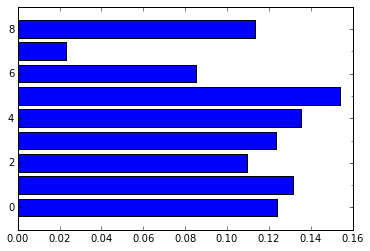

In [67]:
val = rf.feature_importances_   # the bar lengths
pos = np.arange(len(rf.feature_importances_))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.barh(pos,val, align='center')
ax.set_yticks(pos, df_data.columns.tolist())

####Get day of year

In [76]:
def get_doy(df):
    doys = [df.ix[row, 'INITDT_dt'].dayofyear for row in df.index.tolist()]
    return pd.Series(doys, index = df.index)

In [83]:
df_data['INIT_day_of_year'] = get_doy(df_all)

In [84]:
def get_month(df):
    months = [df.ix[row, 'INITDT_dt'].month for row in df.index.tolist()]
    return pd.Series(months, index = df.index)

In [85]:
df_data['INIT_month'] = get_month(df_all)

In [86]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732 entries, 0 to 1000
Data columns (total 11 columns):
Queene_Anne_dist      732 non-null float64
Woodland_Park_dist    732 non-null float64
Space_Needle_dist     732 non-null float64
Seattle_dist          732 non-null float64
latitude              732 non-null float64
longitude             732 non-null float64
neighborhood_cat      732 non-null category
INIT_Quarter          732 non-null category
days_end_FY           732 non-null category
INIT_day_of_year      732 non-null int64
INIT_month            732 non-null int64
dtypes: category(3), float64(6), int64(2)
memory usage: 54.4 KB


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [88]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [89]:
rf.score(X_test, y_test)

-0.13846244599201052

I need to do the cross-validated score

In [93]:
cross_val_score(LinearRegression(normalize=True), X, y, cv=10)

array([-0.70987797,  0.02830475, -0.08971396, -0.38597883, -0.25389707,
       -0.09541763, -0.06624661, -0.0612815 , -0.07650842, -0.06668989])

In [94]:
from sklearn.linear_model import Ridge, Lasso

In [101]:
cross_val_score(Ridge(alpha=0.001, normalize=True), X, y, cv=10)

array([-0.69268314,  0.03162579, -0.08763043, -0.38192172, -0.2557518 ,
       -0.09345142, -0.0643471 , -0.05605076, -0.07202819, -0.06646062])

In [100]:
cross_val_score(Lasso(alpha=0.001, normalize=True), X, y, cv=10)

array([-0.49572825,  0.04365593, -0.06365531, -0.33815968, -0.2695292 ,
       -0.1152706 , -0.0595565 , -0.03670704, -0.0549544 , -0.06979807])

####Maybe try some regularized regression

####Some more EDA

Do month of year, then look at some summary statistics by month: do they change?  Also, look at seasonality of some statistics, e.g., abundance and time to repair, OR the ratio and see if there is a pattern.  Also, there may be some covariates to predict the seasonal pattern as well.

In [102]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732 entries, 0 to 1000
Data columns (total 11 columns):
Queene_Anne_dist      732 non-null float64
Woodland_Park_dist    732 non-null float64
Space_Needle_dist     732 non-null float64
Seattle_dist          732 non-null float64
latitude              732 non-null float64
longitude             732 non-null float64
neighborhood_cat      732 non-null category
INIT_Quarter          732 non-null category
days_end_FY           732 non-null category
INIT_day_of_year      732 non-null int64
INIT_month            732 non-null int64
dtypes: category(3), float64(6), int64(2)
memory usage: 54.4 KB


In [104]:
df_data.groupby('INIT_month').describe()

INIT_day_of_year  Queene_Anne_dist  Seattle_dist  \
INIT_month                                                           
1          count         88.000000         88.000000     88.000000   
           mean          16.329545          3.904192      3.683101   
           std            8.482194          2.034798      2.563166   
           min            1.000000          0.395528      0.000000   
           25%            8.750000          2.473518      1.538764   
           50%           15.500000          3.395027      3.064058   
           75%           23.500000          5.365649      5.762212   
           max           30.000000          9.267342      8.604655   
2          count         85.000000         85.000000     85.000000   
           mean          45.976471          3.680294      3.242066   
           std            6.806818          1.974443      2.403057   
           min           32.000000          0.295069      0.000000   
           25%           42.000000          2.473518      1.207241   
           50%           45.000000          3.240284      3.246133   
           75%           51.000000          5.096520      4.844139   
           max           59.000000          9.417703      8.935073   
3          count        116.000000        116.000000    116.000000   
           mean          76.250000          3.875723      3.531887   
           std            8.507669          1.843639      2.563673   
           min           60.000000          0.176986      0.000000   
           25%           69.750000          2.473518      1.390239   
           50%           76.500000          3.474906      3.167049   
           75%           83.000000          5.497001      5.717914   
           max           90.000000          8.021405      8.604655   
4          count         91.000000         91.000000     91.000000   
           mean         105.604396          3.738075      3.264388   
           std            9.493716          2.112918      2.705092   
           min           91.000000          0.337660      0.000000   
           25%           96.000000          2.473518      1.121819   
           50%          107.000000          2.889252      2.295818   
...                            ...               ...           ...   
9          std            9.946524          2.083684      2.743222   
           min          247.000000          2.210583      0.000000   
           25%          247.500000          2.473518      1.027664   
           50%          257.500000          4.369839      4.512472   
           75%          266.500000          5.383344      5.547916   
           max          272.000000          7.970492      7.380358   
10         count         26.000000         26.000000     26.000000   
           mean         291.192308          4.248945      4.183052   
           std            9.095138          2.207531      2.226359   
           min          275.000000          0.830906      0.000000   
           25%          284.000000          2.761778      2.216477   
           50%          289.000000          3.800866      4.263475   
           75%          299.750000          4.988251      6.042883   
           max          304.000000          9.417703      8.086870   
11         count         44.000000         44.000000     44.000000   
           mean         316.954545          3.553454      3.014145   
           std            8.399763          1.810651      2.398023   
           min          307.000000          1.112244      0.000000   
           25%          309.750000          2.473518      1.289468   
           50%          315.500000          2.748322      2.472576   
           75%          325.000000          4.889956      4.971248   
           max          334.000000          8.304597      8.604655   
12         count         88.000000         88.000000     88.000000   
           mean         350.261364          4.181630      3.775676   
           std            8.

In [105]:
df_data.groupby('INIT_month').mean()

,Queene_Anne_dist,Woodland_Park_dist,Space_Needle_dist,Seattle_dist,latitude,longitude,INIT_day_of_year
INIT_month,,,,,,,
1,3.904192,4.452429,3.728417,3.683101,47.629920,-122.329993,16.329545
2,3.680294,4.506386,3.380987,3.242066,47.621958,-122.334189,45.976471
3,3.875723,4.462087,3.643266,3.531887,47.628545,-122.332519,76.250000
4,3.738075,4.544096,3.419998,3.264388,47.626207,-122.329005,105.604396
5,4.172110,4.694922,3.881008,3.628479,47.632942,-122.321004,134.500000
6,3.617943,4.472319,3.267984,3.129202,47.623788,-122.335327,165.521739
7,3.229564,4.066050,2.919909,2.787249,47.629813,-122.326986,195.228571
8,4.311694,4.581783,4.241820,4.277865,47.632834,-122.330339,227.942857
9,4.381178,5.069757,4.039547,3.721090,47.619900,-122.328075,257.600000


####You only want one of the INIT day of year-type features.